In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
from AAM import generate_capp, AAMfitter, generate_normcapps
from setup import splitData
from sklearn import svm
import numpy as np
%matplotlib inline

tr = np.load('newtr.npy')
trl = np.load('newtrl.npy')
tst = np.load('newtst.npy')
tstl = np.load('newtstl.npy')
aam = np.load('newaam.npy')

In [3]:
from menpofit.aam import LinearAAM
fitter = AAMfitter(aam,LinearAAM)

Now generating Active Appearance Model...
- Computing reference shape                                                     Computing batch 0
- Building modelsges size: [==========] 100% (1418/1418) - done.                
  - Scale 0: Building shape model                                               emaining

/home/ch283/anaconda3/envs/menpo/lib/python3.5/site-packages/menpofit/builder.py:338: MenpoFitModelBuilderWarning: The reference shape passed is not a TriMesh or subclass and therefore the reference frame (mask) will be calculated via a Delaunay triangulation. This may cause small triangles and thus suboptimal warps.
  MenpoFitModelBuilderWarning)
/home/ch283/anaconda3/envs/menpo/lib/python3.5/site-packages/menpo/image/boolean.py:711: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  copy.pixels[slices].flat = point_in_pointcloud(pointcloud, indices)


  - Scale 0: Doneding appearance model                                          
  - Scale 1: Building appearance model                                          

MemoryError: 

In [11]:
capps_lin = generate_normcapps(fitter,tr)
testcapps_lin = generate_normcapps(fitter,tst1)
np.save('capps_lin.npy',capps_lin)
np.save('testcapps_lin.npy',testcapps_lin)

Generating canonical appearance vectors...


/home/ch283/anaconda3/envs/menpo/lib/python3.5/site-packages/menpo/shape/pointcloud.py:261: MenpoDeprecationWarning: The .lms property is deprecated. LandmarkGroups are now shapes themselves - so you can use them directly anywhere you previously used .lms.Simply remove ".lms" from your code and things will work as expected (and this warning will go away)
  MenpoDeprecationWarning)


[====================] 100.0% 0000000001%   Generating canonical appearance vectors...
[====================] 100.0% 9999999999%  

In [13]:
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(capps_lin,trl1)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
pred = clf.predict(testcapps_lin)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(tstl1,pred)

0.315

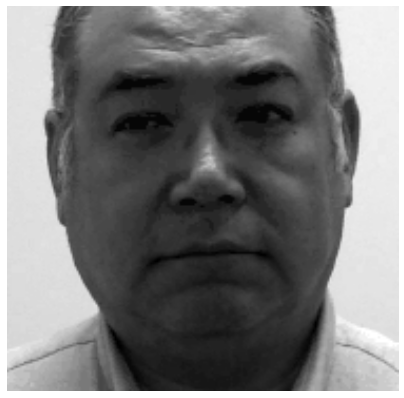

In [17]:
tr1[0].view()

In [18]:
from menpodetect import load_dlib_frontal_face_detector
image = tr1[0]
detect = load_dlib_frontal_face_detector()
# Detectbounding box
bboxes = detect(image)
# initial bbox
initial_bbox = bboxes[0]
# fit image
result = fitter.fit_from_bb(image, initial_bbox, max_iters=[15, 5],
                            gt_shape=image.landmarks['landmarks'].lms)
# get CAPP from fitter object
capp = fitter.appearance_reconstructions(result.appearance_parameters,result.n_iters_per_scale)[-1]


/home/ch283/anaconda3/envs/menpo/lib/python3.5/site-packages/menpo/shape/pointcloud.py:261: MenpoDeprecationWarning: The .lms property is deprecated. LandmarkGroups are now shapes themselves - so you can use them directly anywhere you previously used .lms.Simply remove ".lms" from your code and things will work as expected (and this warning will go away)
  MenpoDeprecationWarning)


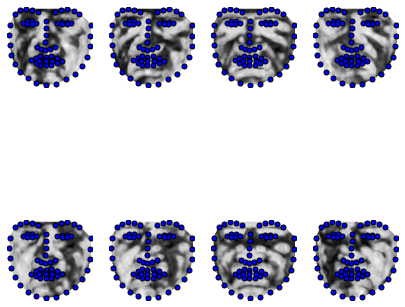

In [19]:
capp.view_landmarks()